In [1]:
#-----------------------------------------------------------------------------------------------------
# WDQ7005 - Data Mining
# Master of Data Science | University of Malaya
# Week 7 Online Assessment: Cleaning and Tidying Data based on the Group Assignment COVID-19 datasets
#
# Student Name:
# Kok Hon Loong (WQD170086)
# Date: 8th May 2020
#-----------------------------------------------------------------------------------------------------

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
from bs4 import BeautifulSoup

<Figure size 1440x720 with 0 Axes>

In [3]:
### =============================== ###
### CODE STRUCTURE
### =============================== ###
#
# We partitioned the code into 3 sections:
# 1. Number of CONFIRMED Global COVID-19 cases, excluding US.
# 2. Number of DEATH Global COVID-19 cases excluding US.
# 3. Number of RECOVERED Global COVID-19 cases excluding US.
#
# For each section, we display the time series trend for ASEAN countries and China and compare between them.

In [4]:
### =============================== ###
### NO. OF CONFIRMED CASES
### =============================== ###
url_confirmed_cases = "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

try:
    page = requests.get(url_confirmed_cases, timeout=5)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content,'html.parser')
        table = soup.find("table", {"class": "js-csv-data csv-data js-file-line-container"})
        df = pd.read_html(str(table))
    else: 
        print(str(page.status_code) + " - Error, page not found.")
except requests.ConnectionError as e:
    print('Connection error')
    print(str(e))

In [5]:
# Put the tabulated data into a dataframe and display the first 5 results:
confirmed_cases = df[0]
confirmed_cases.head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
1,NaN,NaN,Albania,41.1533,20.1683,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842
2,NaN,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,...,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182
3,NaN,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,...,743,743,745,745,747,748,750,751,751,752
4,NaN,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,...,27,27,27,30,35,35,35,36,36,36


In [6]:
# Checking on missing value using isnull() method -> True if missing value, False if have value in the field.
# The inverse method for isnull() is notnull(). 
confirmed_cases.isnull().head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# To check the number of missing value in the dataset, use isnull().sum() method. This method sums the boolean value
# of the column fields for each row which has null values in it.
confirmed_cases.isnull().sum()

Unnamed: 0        266
Province/State    184
Country/Region      0
Lat                 0
Long                0
                 ... 
5/3/20              0
5/4/20              0
5/5/20              0
5/6/20              0
5/7/20              0
Length: 112, dtype: int64

In [8]:
# To check on the number of rows and columns captured in the dataframe
confirmed_cases.shape

(266, 112)

In [9]:
# To drop any rows which has null value in the Province/State column
confirmed_cases.dropna(subset=['Province/State'], how='all').shape

(82, 112)

In [10]:
# To check the total number of Null value records
confirmed_cases['Province/State'].value_counts(dropna=False)

NaN                          184
Tianjin                        1
Inner Mongolia                 1
Xinjiang                       1
Shaanxi                        1
                            ... 
Anguilla                       1
Northwest Territories          1
New Brunswick                  1
Newfoundland and Labrador      1
British Columbia               1
Name: Province/State, Length: 83, dtype: int64

In [11]:
# To replace the null value with Not Applicable for Province/State
confirmed_cases['Province/State'].fillna(value='Not Applicable', inplace=True)
confirmed_cases['Province/State'].value_counts(dropna=False)

Not Applicable               184
Hebei                          1
Shanxi                         1
Liaoning                       1
Inner Mongolia                 1
                            ... 
Anguilla                       1
Northwest Territories          1
New Brunswick                  1
Newfoundland and Labrador      1
Sint Maarten                   1
Name: Province/State, Length: 83, dtype: int64

In [12]:
# To see the columns names only from the dataset stored in the dataframe
confirmed_cases.columns

Index(['Unnamed: 0', 'Province/State', 'Country/Region', 'Lat', 'Long',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       ...
       '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20',
       '5/5/20', '5/6/20', '5/7/20'],
      dtype='object', length=112)

In [13]:
# Drop unneeded columns from the dataframe:
confirmed_cases = confirmed_cases.drop('Unnamed: 0', axis=1)
confirmed_cases = confirmed_cases.drop(['Lat','Long'], axis=1)
confirmed_cases = confirmed_cases.drop('Province/State', axis=1)

# Rename column header to simply 'Country' and set it as the index:
confirmed_cases = confirmed_cases.rename(columns={'Country/Region':'Country'})
confirmed_cases = confirmed_cases.set_index('Country')

# Display first 5 results:
confirmed_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
Albania,0,0,0,0,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842
Algeria,0,0,0,0,0,0,0,0,0,0,...,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182
Andorra,0,0,0,0,0,0,0,0,0,0,...,743,743,745,745,747,748,750,751,751,752
Angola,0,0,0,0,0,0,0,0,0,0,...,27,27,27,30,35,35,35,36,36,36


In [14]:
# COMMENT: From the above table we can see that the number of confirmed cases are increasing for all listed countries.

In [15]:
# Let's transpose the table and describe the data for each of the different countries:
confirmed_cases.transpose().describe()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Netherlands,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,458.345794,219.878505,999.186916,253.616822,8.336449,7.971963,1108.289720,544.009346,40.682243,1137.598131,...,1.336449,7.570093,3.084112,0.308411,5.205607,1.719626,6.766355,1.327103,0.280374,14.925234
std,828.927610,284.908284,1479.134596,311.339124,11.617280,10.282297,1605.242338,775.160513,47.948006,1327.307047,...,2.091961,13.259466,5.088132,0.464011,14.020698,2.627124,29.555697,4.375696,1.219298,68.245216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,42.000000,48.000000,1.000000,0.000000,1.000000,45.000000,26.000000,1.000000,134.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,538.000000,424.500000,1793.000000,601.000000,19.000000,20.000000,1975.000000,952.000000,102.500000,2839.500000,...,2.000000,10.500000,5.000000,1.000000,4.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,3563.000000,842.000000,5182.000000,752.000000,36.000000,25.000000,5371.000000,2884.000000,107.000000,3047.000000,...,6.000000,43.000000,13.000000,1.000000,74.000000,6.000000,187.000000,25.000000,8.000000,461.000000


In [16]:
# COMMENT:
# count - shows how many days of data cases are being tracked. There are 107 days since the first tracking.
# mean - shows the average number of confirmed cases during the 107 days.
# max - the total number of confirmed cases to date.

In [17]:
# Obtain only the confirmed cases for the 10 ASEAN countries + China

# Get data for ASEAN regions:
asean = ['Malaysia', 'Singapore', 'Thailand', 'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Myanmar', 'Philippines', 'Vietnam']
confirmed_cases_asean = confirmed_cases[confirmed_cases.index.isin(asean)]
confirmed_cases_asean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
Brunei,0,0,0,0,0,0,0,0,0,0,...,138,138,138,138,138,138,138,138,139,141
Cambodia,0,0,0,0,0,1,1,1,1,1,...,122,122,122,122,122,122,122,122,122,122
Indonesia,0,0,0,0,0,0,0,0,0,0,...,9511,9771,10118,10551,10843,11192,11587,12071,12438,12776
Malaysia,0,0,0,3,4,4,4,7,8,8,...,5851,5945,6002,6071,6176,6298,6353,6383,6428,6467
Philippines,0,0,0,0,0,0,0,0,1,1,...,7958,8212,8488,8772,8928,9223,9485,9684,10004,10343
Singapore,0,1,3,3,4,5,7,7,10,13,...,14951,15641,16169,17101,17548,18205,18778,19410,20198,20939
Thailand,2,3,5,7,8,8,14,14,14,19,...,2938,2947,2954,2960,2966,2969,2987,2988,2989,2992
Vietnam,0,2,2,2,2,2,2,2,2,2,...,270,270,270,270,270,271,271,271,271,288
Laos,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19


In [18]:
# China:
confirmed_cases_china = confirmed_cases[confirmed_cases.index == 'China']
confirmed_cases_china.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
China,1,9,15,39,60,70,106,152,200,237,...,991,991,991,991,991,991,991,991,991,991
China,14,22,36,41,68,80,91,111,114,139,...,593,593,593,593,593,593,593,593,593,593
China,6,9,27,57,75,110,132,147,182,211,...,579,579,579,579,579,579,579,579,579,579
China,1,5,10,18,35,59,80,84,101,120,...,355,355,356,356,356,356,356,356,356,356
China,0,2,2,4,7,14,19,24,26,29,...,139,139,139,139,139,139,139,139,139,139


In [19]:
# For China, we combined all the different regions into a single row representing the entire China:
confirmed_cases_china_combined = confirmed_cases_china.groupby('Country').sum()
confirmed_cases_china_combined

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,83940,83944,83956,83959,83959,83964,83966,83968,83970,83975


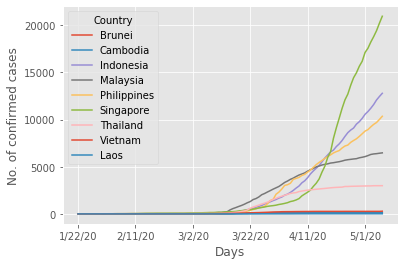

In [21]:
# Plot the number of confirmed cases over time for all ASEAN countries:

confirmed_cases_asean.T.plot()
plt.ylabel('No. of confirmed cases')
plt.xlabel('Days')
plt.show()

In [22]:
# Note: The data will keep changing based on yesterday data updated
# COMMENT as of 8 May 2020: Singapore has the most number of recorded confirmed cases and are increasing exponentially.
# Indonesia is second followed by Philippnes as the 3rd most recorded confirmed cases in ASEAN.

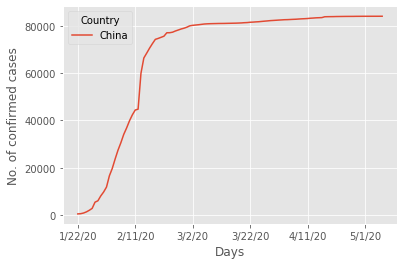

In [23]:
# Plot the number of confirmed cases over time for China:

confirmed_cases_china_combined.T.plot()
plt.ylabel('No. of confirmed cases')
plt.xlabel('Days')
plt.show()

In [24]:
# COMMENT: Confirmed cases in China continues to rise initially and is now flattening. More than 80k cases confirmed to date.

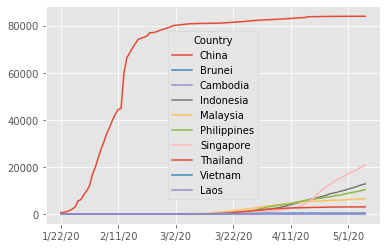

In [25]:
# Plot the number of confirmed cases over time for China vs ASEAN countries:

ax = confirmed_cases_china_combined.T.plot()
confirmed_cases_asean.T.plot(ax=ax)

In [26]:
# COMMENT: China numbers are too huge to compare with the number of cases in ASEAN.

In [27]:
### =============================== ###
### NO. OF DEATH CASES
### =============================== ###
url_death_cases = "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

try:
    page = requests.get(url_death_cases, timeout=5)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content,'html.parser')
        table = soup.find("table", {"class": "js-csv-data csv-data js-file-line-container"})
        df = pd.read_html(str(table))
    else: 
        print(str(page.status_code) + " - Error, page not found.")
except requests.ConnectionError as e:
    print('Connection error')
    print(str(e))

In [28]:
# Put the tabulated data into a dataframe and display the first 5 results:
death_cases = df[0]
death_cases.head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,...,58,60,64,68,72,85,90,95,104,106
1,NaN,NaN,Albania,41.1533,20.1683,0,0,0,0,0,...,30,30,31,31,31,31,31,31,31,31
2,NaN,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,...,437,444,450,453,459,463,465,470,476,483
3,NaN,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,...,41,42,42,43,44,45,45,46,46,47
4,NaN,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [29]:
# Checking on missing value using isnull() method -> True if missing value, False if have value in the field.
# The inverse method for isnull() is notnull(). 
death_cases.isnull().head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# To check the number of missing value in the dataset, use isnull().sum() method. This method sums the boolean value
# of the column fields for each row which has null values in it.
death_cases.isnull().sum()

Unnamed: 0        266
Province/State    184
Country/Region      0
Lat                 0
Long                0
                 ... 
5/3/20              0
5/4/20              0
5/5/20              0
5/6/20              0
5/7/20              0
Length: 112, dtype: int64

In [31]:
# To check on the number of rows and columns captured in the dataframe
death_cases.shape

(266, 112)

In [32]:
# To drop any rows which has null value in the Province/State column
death_cases.dropna(subset=['Province/State'], how='all').shape

(82, 112)

In [33]:
# To check the total number of Null value records
death_cases['Province/State'].value_counts(dropna=False)

NaN                          184
Tianjin                        1
Inner Mongolia                 1
Xinjiang                       1
Shaanxi                        1
                            ... 
Anguilla                       1
Northwest Territories          1
New Brunswick                  1
Newfoundland and Labrador      1
British Columbia               1
Name: Province/State, Length: 83, dtype: int64

In [34]:
# To replace the null value with NA for Province/State
death_cases['Province/State'].fillna(value='Not Applicable', inplace=True)
death_cases['Province/State'].value_counts(dropna=False)

Not Applicable               184
Hebei                          1
Shanxi                         1
Liaoning                       1
Inner Mongolia                 1
                            ... 
Anguilla                       1
Northwest Territories          1
New Brunswick                  1
Newfoundland and Labrador      1
Sint Maarten                   1
Name: Province/State, Length: 83, dtype: int64

In [35]:
# To see the columns names only from the dataset stored in the dataframe
death_cases.columns

Index(['Unnamed: 0', 'Province/State', 'Country/Region', 'Lat', 'Long',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       ...
       '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20',
       '5/5/20', '5/6/20', '5/7/20'],
      dtype='object', length=112)

In [36]:
# Drop unneeded columns from the dataframe:
death_cases = death_cases.drop('Unnamed: 0', axis=1)
death_cases = death_cases.drop(['Lat','Long'], axis=1)
death_cases = death_cases.drop('Province/State', axis=1)

# Rename column header to simply 'Country' and set it as the index:
death_cases = death_cases.rename(columns={'Country/Region':'Country'})
death_cases = death_cases.set_index('Country')

# Display first 5 results:
death_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,58,60,64,68,72,85,90,95,104,106
Albania,0,0,0,0,0,0,0,0,0,0,...,30,30,31,31,31,31,31,31,31,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,437,444,450,453,459,463,465,470,476,483
Andorra,0,0,0,0,0,0,0,0,0,0,...,41,42,42,43,44,45,45,46,46,47
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [37]:
# Transpose the table and describe the data for each of the different countries:
death_cases.transpose().describe()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Netherlands,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan
count,107.000000,107.000000,107.000000,107.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.0,107.000000,107.0,107.0,107.0,107.0,107.000000,107.000000,107.000000,107.000000
mean,14.102804,9.682243,119.532710,11.88785,0.747664,0.775701,50.719626,7.485981,0.897196,10.934579,...,0.0,0.691589,0.0,0.0,0.0,0.0,0.149533,0.224299,0.018692,0.299065
std,25.520223,12.116259,174.828828,16.76774,0.972193,1.253737,80.769506,12.023848,1.265914,14.256591,...,0.0,1.152612,0.0,0.0,0.0,0.0,0.641398,0.872087,0.136071,1.506057
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,4.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,16.500000,23.000000,265.500000,26.00000,2.000000,2.000000,82.500000,12.500000,2.000000,22.500000,...,0.0,1.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,106.000000,31.000000,483.000000,47.00000,2.000000,3.000000,282.000000,42.000000,3.000000,44.000000,...,0.0,3.000000,0.0,0.0,0.0,0.0,4.000000,5.000000,1.000000,12.000000


In [38]:
# COMMENT:
# count - shows how many days of data cases are being tracked. There are 107 days since the first tracking.
# mean - shows the average number of death cases during the 107 days.
# max - the total number of death cases to date.

In [39]:
# Obtain only the death cases for the 10 ASEAN countries + China

# Get data for ASEAN regions:
asean = ['Malaysia', 'Singapore', 'Thailand', 'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Myanmar', 'Philippines', 'Vietnam']
death_cases_asean = death_cases[death_cases.index.isin(asean)]
death_cases_asean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
Brunei,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Cambodia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Indonesia,0,0,0,0,0,0,0,0,0,0,...,773,784,792,800,831,845,864,872,895,930
Malaysia,0,0,0,0,0,0,0,0,0,0,...,100,100,102,103,103,105,105,106,107,107
Philippines,0,0,0,0,0,0,0,0,0,0,...,530,558,568,579,603,607,623,637,658,685
Singapore,0,0,0,0,0,0,0,0,0,0,...,14,14,15,16,17,18,18,18,20,20
Thailand,0,0,0,0,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,55,55
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Laos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# China:
death_cases_china = death_cases[death_cases.index == 'China']
death_cases_china.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
China,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
China,0,0,0,0,0,1,1,1,1,1,...,9,9,9,9,9,9,9,9,9,9
China,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
China,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
China,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [41]:
# For China, we combined all the different regions into a single row representing the entire China:
death_cases_china_combined = death_cases_china.groupby('Country').sum()
death_cases_china_combined

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
China,17,18,26,42,56,82,131,133,171,213,...,4637,4637,4637,4637,4637,4637,4637,4637,4637,4637


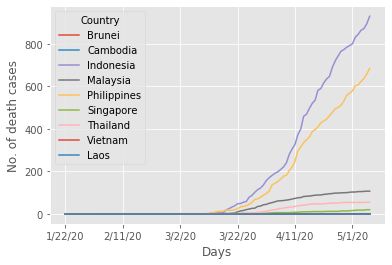

In [42]:
# Plot the number of death cases over time for all ASEAN countries:

death_cases_asean.T.plot()
plt.ylabel('No. of death cases')
plt.xlabel('Days')
plt.show()

In [43]:
# COMMENT: The number of deaths from the covid-19 is growing in the ASEAN region.
# Top 3 countries with patients have died: 930 from Indonesia, 685 from Philippines, and 107 from Malaysia.

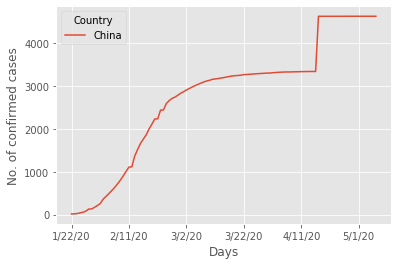

In [44]:
# Plot the number of death cases over time for China:

death_cases_china_combined.T.plot()
plt.ylabel('No. of confirmed cases')
plt.xlabel('Days')
plt.show()

In [45]:
# COMMENT: The number of death cases in China has risen to more than 4k cases.

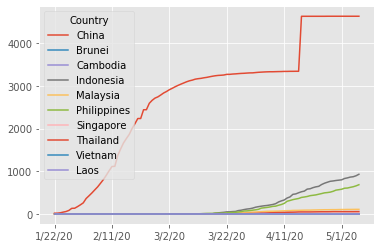

In [46]:
# Plot the number of death cases over time for China vs ASEAN countries:

ax = death_cases_china_combined.T.plot()
death_cases_asean.T.plot(ax=ax)

In [47]:
# COMMENT: Deaths in ASEAN countries due to covid-19 is low compared to China.

In [48]:
### =============================== ###
### NO. OF RECOVERED CASES
### =============================== ###
url_recovered_cases = "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

try:
    page = requests.get(url_recovered_cases, timeout=5)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content,'html.parser')
        table = soup.find("table", {"class": "js-csv-data csv-data js-file-line-container"})
        df = pd.read_html(str(table))
    else: 
        print(str(page.status_code) + " - Error, page not found.")
except requests.ConnectionError as e:
    print('Connection error')
    print(str(e))

In [49]:
 # Put the tabulated data into a dataframe and display the first 5 results:
recovered_cases = df[0]
recovered_cases.head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,...,228,252,260,310,331,345,397,421,458,468
1,NaN,NaN,Albania,41.1533,20.1683,0,0,0,0,0,...,431,455,470,488,519,531,543,570,595,605
2,NaN,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,...,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323
3,NaN,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,...,398,423,468,468,472,493,499,514,521,526
4,NaN,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,...,6,7,7,11,11,11,11,11,11,11


In [50]:
# Checking on missing value using isnull() method -> True if missing value, False if have value in the field.
# The inverse method for isnull() is notnull(). 
recovered_cases.isnull().head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
# To check the number of missing value in the dataset, use isnull().sum() method. This method sums the boolean value
# of the column fields for each row which has null values in it.
recovered_cases.isnull().sum()

Unnamed: 0        252
Province/State    185
Country/Region      0
Lat                 0
Long                0
                 ... 
5/3/20              0
5/4/20              0
5/5/20              0
5/6/20              0
5/7/20              0
Length: 112, dtype: int64

In [52]:
# To check on the number of rows and columns captured in the dataframe
recovered_cases.shape

(252, 112)

In [53]:
# To drop any rows which has null value in the Province/State column
recovered_cases.dropna(subset=['Province/State'], how='all').shape

(67, 112)

In [54]:
# To check the total number of Null value records
recovered_cases['Province/State'].value_counts(dropna=False)

NaN                             185
Guizhou                           1
Inner Mongolia                    1
Xinjiang                          1
Liaoning                          1
                               ... 
Hainan                            1
South Australia                   1
Australian Capital Territory      1
Aruba                             1
Guangdong                         1
Name: Province/State, Length: 68, dtype: int64

In [55]:
# To replace the null value with Not Applicable for Province/State
recovered_cases['Province/State'].fillna(value='Not Applicable', inplace=True)
recovered_cases['Province/State'].value_counts(dropna=False)

Not Applicable                      185
Hebei                                 1
Guizhou                               1
Bonaire, Sint Eustatius and Saba      1
Liaoning                              1
                                   ... 
Hainan                                1
South Australia                       1
Australian Capital Territory          1
Aruba                                 1
Hong Kong                             1
Name: Province/State, Length: 68, dtype: int64

In [56]:
# To see the columns names only from the dataset stored in the dataframe
recovered_cases.columns

Index(['Unnamed: 0', 'Province/State', 'Country/Region', 'Lat', 'Long',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       ...
       '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20',
       '5/5/20', '5/6/20', '5/7/20'],
      dtype='object', length=112)

In [57]:
# Drop unneeded columns from the dataframe:
recovered_cases = recovered_cases.drop('Unnamed: 0', axis=1)
recovered_cases = recovered_cases.drop(['Lat','Long'], axis=1)
recovered_cases = recovered_cases.drop('Province/State', axis=1)

In [58]:
# Rename column header to simply 'Country' and set it as the index:
recovered_cases = recovered_cases.rename(columns={'Country/Region':'Country'})
recovered_cases = recovered_cases.set_index('Country')

In [59]:
# Display first 5 results:
recovered_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,228,252,260,310,331,345,397,421,458,468
Albania,0,0,0,0,0,0,0,0,0,0,...,431,455,470,488,519,531,543,570,595,605
Algeria,0,0,0,0,0,0,0,0,0,0,...,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323
Andorra,0,0,0,0,0,0,0,0,0,0,...,398,423,468,468,472,493,499,514,521,526
Angola,0,0,0,0,0,0,0,0,0,0,...,6,7,7,11,11,11,11,11,11,11


In [60]:
# Transpose the table and describe the data for each of the different countries:
recovered_cases.transpose().describe()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Netherlands,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.0,107.000000,107.000000,107.0,107.0,107.000000,107.000000,107.000000,107.0,107.0
mean,53.112150,112.093458,363.364486,85.663551,1.934579,2.177570,284.766355,185.467290,25.878505,408.009346,...,0.0,1.158879,1.906542,0.0,0.0,0.700935,0.373832,0.130841,0.0,0.0
std,110.099554,177.400439,643.883858,157.467993,3.251331,4.677955,452.567363,339.310353,39.833074,839.447904,...,0.0,2.727047,4.140305,0.0,0.0,1.744073,1.169772,0.338813,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,32.000000,189.500000,432.500000,71.000000,3.000000,0.000000,407.500000,161.000000,59.000000,4.000000,...,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
max,468.000000,605.000000,2323.000000,526.000000,11.000000,16.000000,1601.000000,1185.000000,103.000000,2486.000000,...,0.0,14.000000,13.000000,0.0,0.0,5.000000,4.000000,1.000000,0.0,0.0


In [62]:
# COMMENT:
# count - shows how many days of data cases are being tracked. There are 107 days since the first tracking.
# mean - shows the average number of recovered cases during the 107 days.
# max - the total number of recovered cases to date.

In [63]:
# Obtain only the recovered cases for the 10 ASEAN countries + China

# Get data for ASEAN regions:
asean = ['Malaysia', 'Singapore', 'Thailand', 'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Myanmar', 'Philippines', 'Vietnam']
recovered_cases_asean = recovered_cases[recovered_cases.index.isin(asean)]
recovered_cases_asean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
Brunei,0,0,0,0,0,0,0,0,0,0,...,124,124,124,124,126,128,130,131,131,131
Cambodia,0,0,0,0,0,0,0,0,0,0,...,119,119,119,120,120,120,120,120,120,120
Indonesia,0,0,0,0,0,0,0,0,0,0,...,1254,1391,1522,1591,1665,1876,1954,2197,2317,2381
Malaysia,0,0,0,0,0,0,0,0,0,0,...,4032,4087,4171,4210,4326,4413,4484,4567,4702,4776
Philippines,0,0,0,0,0,0,0,0,0,0,...,975,1023,1043,1084,1124,1214,1315,1408,1506,1618
Singapore,0,0,0,0,0,0,0,0,0,0,...,1128,1188,1244,1268,1347,1408,1457,1519,1634,1712
Thailand,0,0,0,0,2,2,5,5,5,5,...,2652,2665,2684,2719,2732,2739,2740,2747,2761,2772
Vietnam,0,0,0,0,0,0,0,0,0,0,...,222,222,219,219,219,219,219,232,232,233
Laos,0,0,0,0,0,0,0,0,0,0,...,7,7,8,8,9,9,9,9,10,9


In [64]:
# China:
recovered_cases_china = recovered_cases[recovered_cases.index == 'China']
recovered_cases_china.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
China,0,0,0,0,0,0,0,2,2,3,...,985,985,985,985,985,985,985,985,985,985
China,0,0,1,2,2,2,4,4,4,5,...,538,542,547,547,547,553,554,555,557,560
China,0,0,0,0,0,0,0,1,1,1,...,573,573,573,573,573,573,573,573,573,573
China,0,0,0,0,0,0,0,0,0,0,...,352,353,353,353,353,353,353,353,354,354
China,0,0,0,0,0,0,0,0,0,0,...,137,137,137,137,137,137,137,137,137,137


In [65]:
# For China, we combined all the different regions into a single row representing the entire China:
recovered_cases_china_combined = recovered_cases_china.groupby('Country').sum()
recovered_cases_china_combined

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
China,28,30,36,39,49,58,101,120,135,214,...,78422,78474,78523,78573,78586,78684,78792,78870,78929,78977


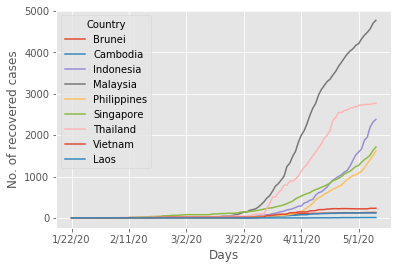

In [66]:
# Plot the number of recovered cases over time for all ASEAN countries:

recovered_cases_asean.T.plot()
plt.ylabel('No. of recovered cases')
plt.xlabel('Days')
plt.show()

In [67]:
# COMMENT: Malaysia continues to lead in terms of the number of patients who recovered from Covid-19 across ASEAN countries.
# Thailand is second in recovery, while Indonesia is in 3rd place.

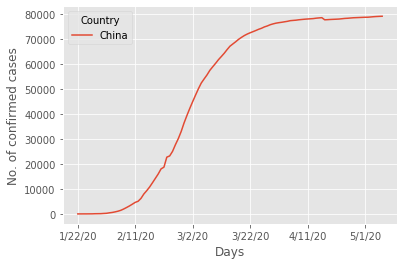

In [68]:
# Plot the number of recovered cases over time for China:

recovered_cases_china_combined.T.plot()
plt.ylabel('No. of confirmed cases')
plt.xlabel('Days')
plt.show()

In [69]:
# COMMENT: Despite the huge number of confirmed cases at 80k, the number of patients who recovered is also increasing rapidly at 60k people.

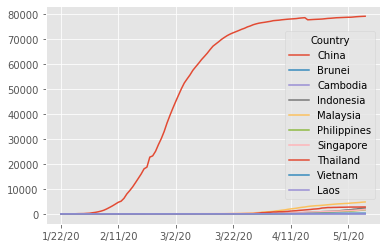

In [70]:
# Plot the number of recovered cases over time for China vs ASEAN countries:

ax = recovered_cases_china_combined.T.plot()
recovered_cases_asean.T.plot(ax=ax)

In [71]:
# COMMENT: China recovery has the most increasing since they have the most case, while ASEAN countries are seen recovering as well but ASEAN cases are lower compared to China.

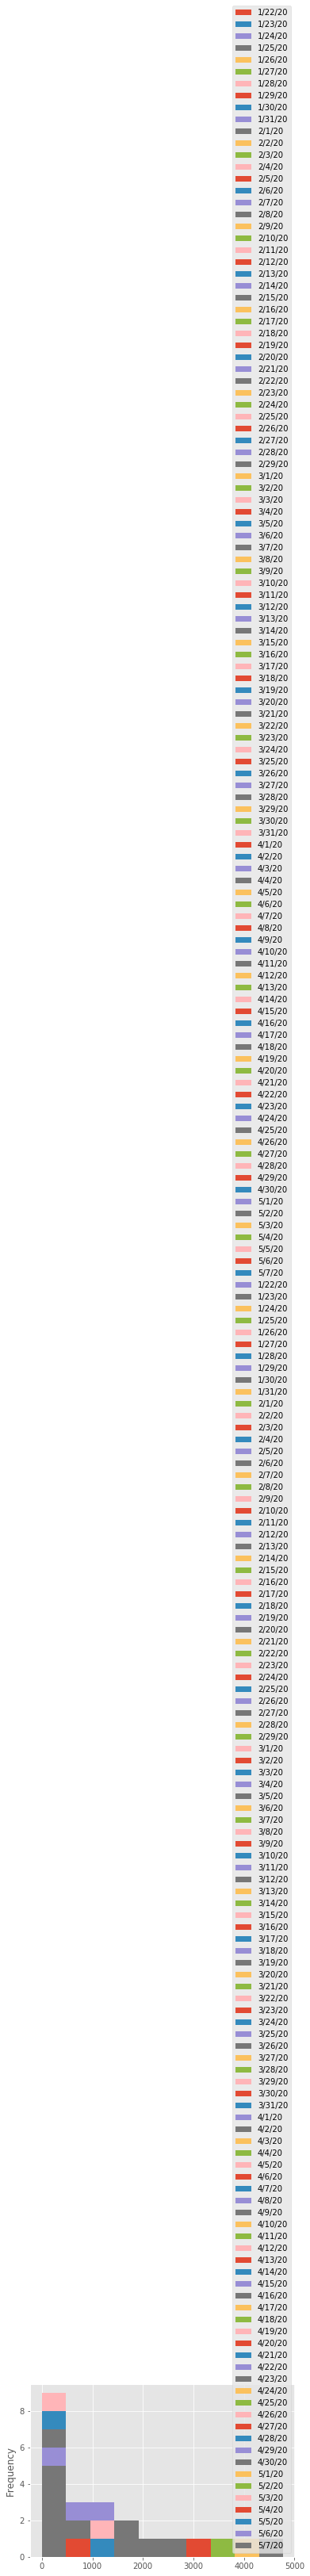

In [72]:
### =============================== ###
### COMPARISON OF DEATH vs RECOVERED
### =============================== ###

# For ASEAN countries:

ax = death_cases_asean.plot(kind='hist')
recovered_cases_asean.plot(kind='hist', ax=ax)

In [74]:
recovered_cases_asean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Country,,,,,,,,,,,,,,,,,,,,,
Brunei,0,0,0,0,0,0,0,0,0,0,...,124,124,124,124,126,128,130,131,131,131
Cambodia,0,0,0,0,0,0,0,0,0,0,...,119,119,119,120,120,120,120,120,120,120
Indonesia,0,0,0,0,0,0,0,0,0,0,...,1254,1391,1522,1591,1665,1876,1954,2197,2317,2381
Malaysia,0,0,0,0,0,0,0,0,0,0,...,4032,4087,4171,4210,4326,4413,4484,4567,4702,4776
Philippines,0,0,0,0,0,0,0,0,0,0,...,975,1023,1043,1084,1124,1214,1315,1408,1506,1618
Singapore,0,0,0,0,0,0,0,0,0,0,...,1128,1188,1244,1268,1347,1408,1457,1519,1634,1712
Thailand,0,0,0,0,2,2,5,5,5,5,...,2652,2665,2684,2719,2732,2739,2740,2747,2761,2772
Vietnam,0,0,0,0,0,0,0,0,0,0,...,222,222,219,219,219,219,219,232,232,233
Laos,0,0,0,0,0,0,0,0,0,0,...,7,7,8,8,9,9,9,9,10,9


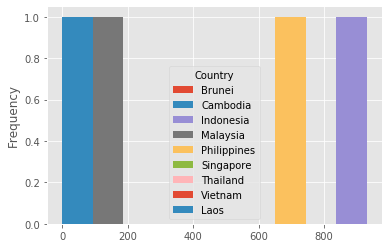

In [75]:
death_cases_asean.transpose()[-1:].plot(kind='hist')

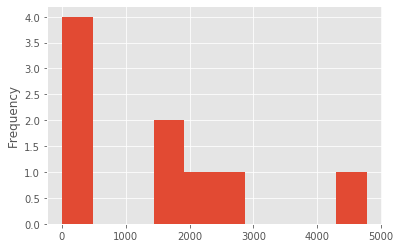

In [76]:
recovered_cases_asean.transpose()[-1:].unstack().plot(kind='hist')